In [ ]:
from keras.datasets import cifar100
from keras.utils import np_utils

#load du lieu train test
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#ep kieu va dua ve mau xam
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
# hien thi hinh dang cua x_train va y_train
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
# tao model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.layers.pooling import MaxPooling2D

model = Sequential()
# khoi tich chap 1
model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding ='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# khoi tich chap 2
model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding ='same'))
model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# khoi tich chap 3
model.add(Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding ='same'))
model.add(Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))


In [ ]:
#ANN Train
# lam phang model
model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(100, activation = 'softmax'))
model.summary()
opt = SGD(lr = 0.01, momentum =0.0)
model.compile(optimizer= opt, loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_data = (x_test, y_test), verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
391/391 [==============================] - 14s 35ms/step - loss: 4.4923 - accuracy: 0.0347 - val_loss: 4.3087 - val_accuracy: 0.0571
Epoch 2/100
391/391 [==============================] - 13s 33ms/step - loss: 4.1420 - accuracy: 0.0754 - val_loss: 3.9924 - val_accuracy: 0.0977
Epoch 3/100
391/391 [==============================] - 13s 33ms/step - loss: 3.8678 - accuracy: 0.1172 - val_loss: 3.7999 - val_accuracy: 0.1299
Epoch 4/100
391/391 [==============================] - 13s 33ms/step - loss: 3.6549 - accuracy: 0.1553 - val_loss: 3.6423 - val_accuracy: 0.1521
Epoch 5/100
391/391 [==============================] - 13s 33ms/step - loss: 3.4837 - accuracy: 0.1822 - val_loss: 3.4420 - val_accuracy: 0.1908
Epoch 6/100
391/391 [==============================] - 13s 33ms/step - loss: 3.3472 - accuracy: 0.2062 - val_loss: 3.3825 - val_accuracy: 0.1982
Epoch 7/100
391/391 [==============================] - 13s 33ms/step - loss: 3.2187 - accuracy: 0.2291 - val_loss: 3.2470 - val_ac

In [ ]:
model.save('Cifar100_CNN.h5')

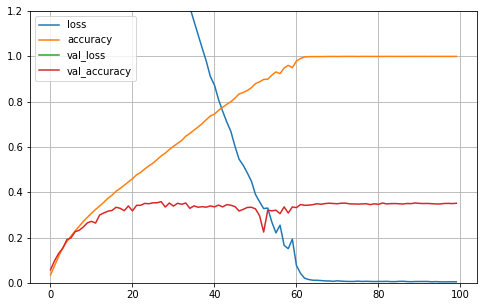

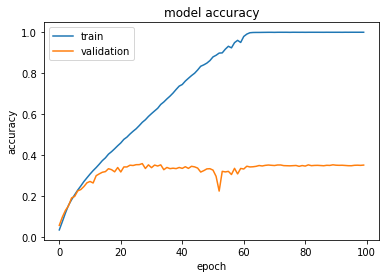

In [ ]:
#ve do thi
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

85


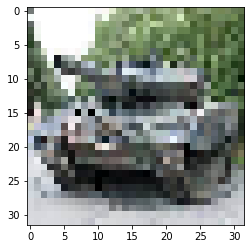

73


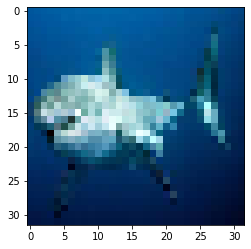

34


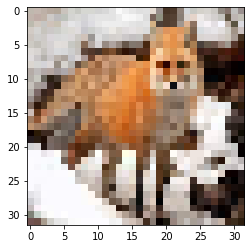

In [ ]:
# predict
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
def predict(image):
  img = load_img(f'{image}.jfif', target_size = (32, 32))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 32, 32, 3)
  img = img.astype('float32')
  img /= 255
  pred = int(np.argmax(model.predict(img), axis = 1))
  print(pred)
  plt.show()


predict('tank')
predict('shark')
predict('fox1')
